# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [47]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [48]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [49]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,421,98,48,101,195,61,11,207,31,23,152,227,650,193,71,5,7,189,196
1,47,85,42,66,122,54,6,148,46,19,141,172,317,174,88,6,14,180,182
2,302,94,37,72,193,72,6,158,41,19,133,184,385,127,70,0,14,200,204
3,100,82,45,66,252,126,52,148,45,19,144,237,326,185,119,1,1,181,185
4,18,104,54,100,186,61,10,216,31,24,173,225,686,220,74,5,11,185,195
5,534,90,39,57,114,48,7,135,51,18,139,155,261,151,85,12,8,183,182
6,97,86,43,68,152,62,7,150,44,19,142,179,337,164,75,4,9,188,192
7,105,108,53,103,202,64,10,220,30,25,168,224,711,214,73,11,10,188,199
8,174,93,48,84,150,63,11,156,44,20,165,171,354,188,73,8,15,185,195
9,763,102,52,98,225,71,10,214,31,24,164,228,682,199,71,0,16,187,196


Methods `describe` and `info` deliver some useful information.

In [50]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,429.633880,93.876138,44.967213,82.021858,169.513661,61.883424,8.653916,169.027322,40.872495,20.606557,148.358834,189.045537,440.735883,175.236794,72.581056,6.400729,12.413479,188.928962,195.535519
std,248.503203,8.167451,6.139707,15.571576,34.385246,8.526958,4.733065,33.007149,7.808740,2.577633,14.395883,31.463855,175.012475,32.469672,7.526552,4.952666,8.814713,6.081297,7.297204
min,2.000000,76.000000,34.000000,42.000000,105.000000,47.000000,3.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,212.000000,88.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,167.000000,317.000000,148.000000,68.000000,2.000000,5.000000,184.000000,191.000000
50%,437.000000,93.000000,45.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,147.000000,179.000000,367.000000,174.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,650.000000,100.000000,50.000000,98.000000,195.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,600.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,112.000000,333.000000,138.000000,52.000000,260.000000,59.000000,28.000000,188.000000,320.000000,982.000000,262.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [51]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [52]:
### YOUR CODE HERE
filtered_dataset = np.ndarray((0, dataset.shape[1]))
for datarow in dataset:
    # Визуально в 14 колонке есть выбросы со слишком большим значением (118)
    if datarow[14] < 100:
        filtered_dataset = np.vstack((filtered_dataset,datarow))

#Убираем 0 столбец, т.к. он содержит порядковые номера, а не существенные признаки
filtered_dataset = np.delete(filtered_dataset,0,axis=1)
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [62]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

parameters = {'C':np.linspace(1,10,5)}
grid_clf = GridSearchCV(log_reg, parameters, scoring=['f1_micro', 'accuracy'], refit='accuracy')
grid_clf.fit(X_train, y_train)
y_probas = grid_clf.predict_proba(X_test)

C:\Users\Timur\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Timur\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Timur\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Timur\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Timur\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Timur\.conda\envs\ML\Lib\site-packages\sklearn\linear_model\_sag.py:350: Con

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

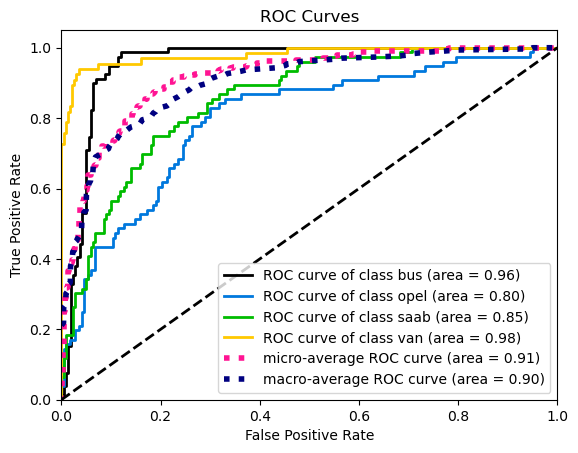

In [54]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
import scikitplot as skplt
skplt.metrics.plot_roc(y_test, y_probas)
# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [55]:
### YOUR CODE HERE

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [56]:
### YOUR CODE HERE

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [57]:
### YOUR CODE HERE

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [58]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [59]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [60]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [61]:
# YOUR CODE HERE